In [81]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [82]:
df = pd.read_excel('mobilesales.xlsx')

In [83]:
df

,DATE,Sales
0,2001-01-01,6519.0
1,2001-02-01,6654.0
2,2001-03-01,7332.0
3,2001-04-01,7332.0
4,2001-05-01,8240.0
...,...,...
212,2018-09-01,13838.0
213,2018-10-01,15351.0
214,2018-11-01,15615.0
215,2018-12-01,16941.0


In [84]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [85]:
df['DATE'].describe()

C:\Users\gaura\AppData\Local\Temp\ipykernel_12952\2562543219.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['DATE'].describe()


count                     217
unique                    217
top       2001-01-01 00:00:00
freq                        1
first     2001-01-01 00:00:00
last      2019-01-01 00:00:00
Name: DATE, dtype: object

In [86]:
df.set_index('DATE',inplace=True)


In [87]:
df.head()

,Sales
DATE,
2001-01-01,6519.0
2001-02-01,6654.0
2001-03-01,7332.0
2001-04-01,7332.0
2001-05-01,8240.0


<Axes: xlabel='DATE'>

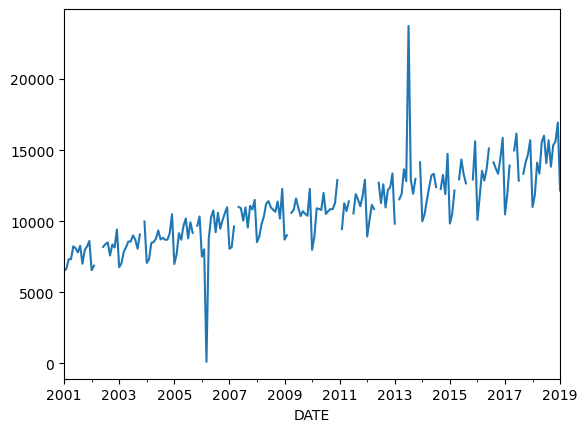

In [88]:
df['Sales'].plot()

In [89]:
df.isna().sum()

Sales    19
dtype: int64

In [90]:
df.loc[df['Sales'].isna()]

,Sales
DATE,
2002-03-01,NaN
2002-04-01,NaN
2002-05-01,NaN
2003-11-01,NaN
2005-10-01,NaN
2007-04-01,NaN
2009-03-01,NaN
2011-01-01,NaN
2011-06-01,NaN


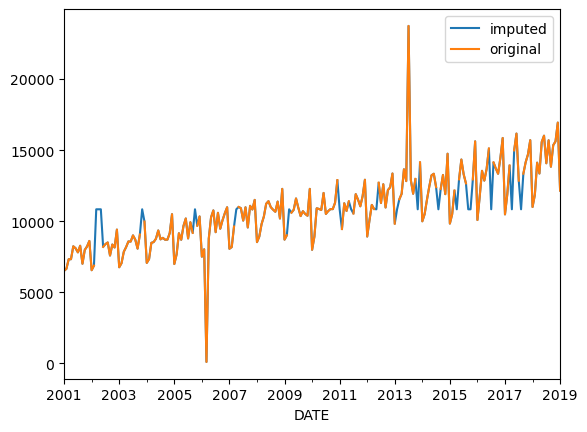

In [91]:
df['Sales'].fillna(df['Sales'].mean()).plot(label='imputed')
df['Sales'].plot(label='original')
plt.legend()
plt.show()

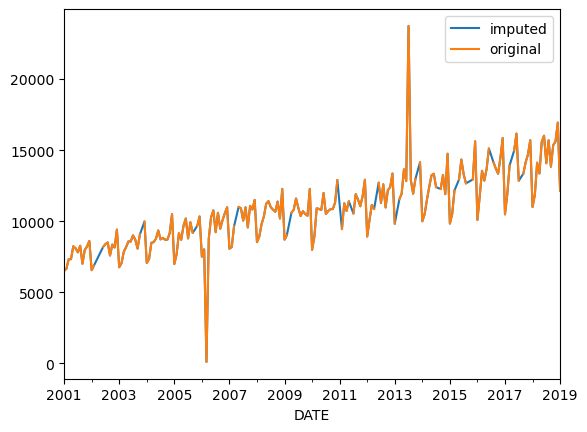

In [92]:
x = df['Sales'].interpolate(method='linear')
x.plot(label='imputed')
df['Sales'].plot(label='original')
plt.legend()
plt.show()

In [93]:
df['Sales'] = x

In [94]:
df['Sales'] = df['Sales'].clip(upper=df['Sales'].quantile(0.98),lower=df['Sales'].quantile(0.02))

In [95]:
df['Sales'] 

DATE
2001-01-01     6802.44
2001-02-01     6802.44
2001-03-01     7332.00
2001-04-01     7332.00
2001-05-01     8240.00
                ...   
2018-09-01    13838.00
2018-10-01    15351.00
2018-11-01    15615.00
2018-12-01    15809.40
2019-01-01    12160.00
Name: Sales, Length: 217, dtype: float64

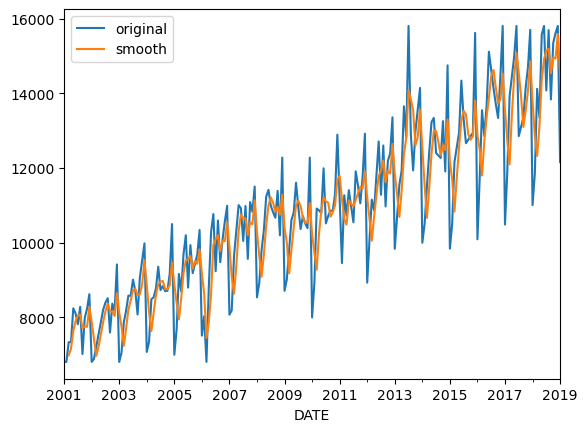

In [98]:
df['Sales'].plot(label='original')
df['Sales'].rolling(3,center=False).mean().plot(label='smooth')
plt.legend()
plt.show()

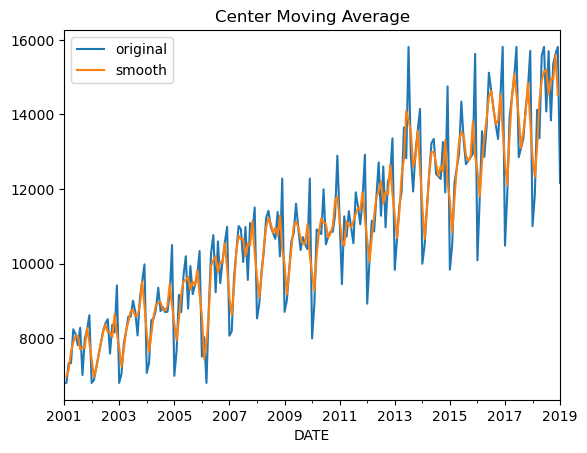

In [99]:
plt.title('Center Moving Average')
df['Sales'].plot(label='original')
df['Sales'].rolling(3,center=True).mean().plot(label='smooth')
plt.legend()
plt.show()

In [100]:
import statsmodels.api as sm

In [101]:
model = sm.tsa.seasonal_decompose(df['Sales'],model ='additive')

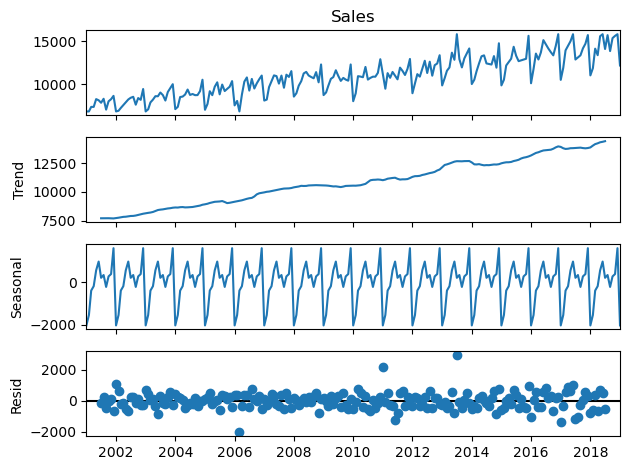

In [103]:
model.plot()
plt.show()

<Axes: xlabel='DATE'>

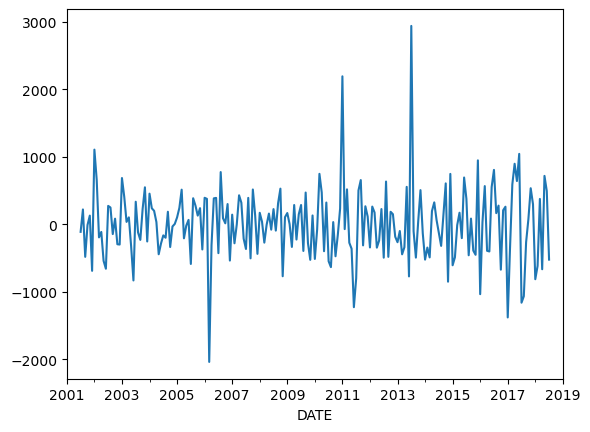

In [104]:
model.resid.plot()

<Axes: >

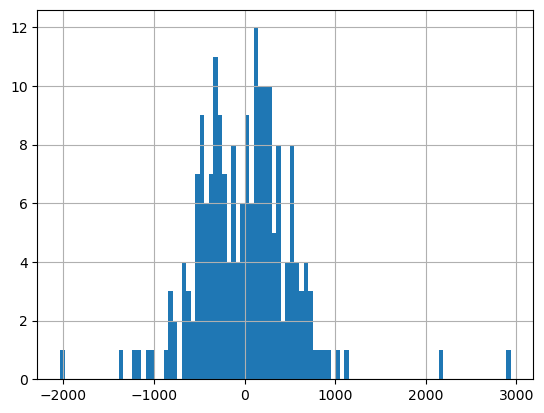

In [105]:
model.resid.hist(bins=100)

In [106]:
# Decomposition from scratch

<Axes: xlabel='DATE'>

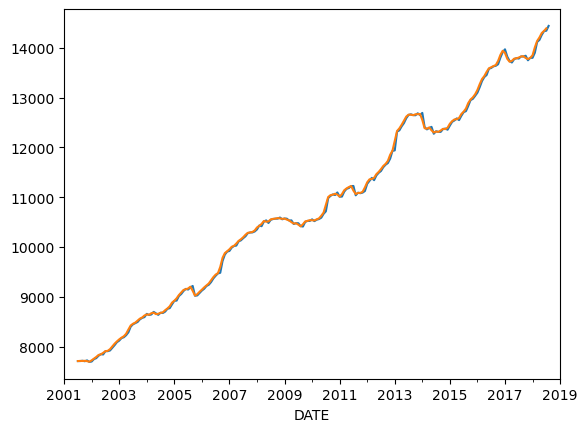

In [108]:
trend = df['Sales'].rolling(12,center=True).mean()
trend.plot()
model.trend.plot()

<Axes: xlabel='DATE'>

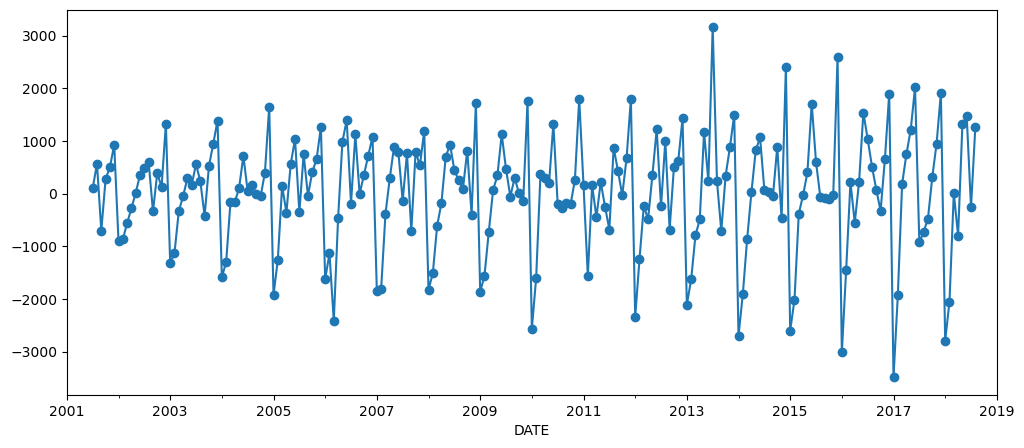

In [112]:
de_trned = df['Sales'] - trend 
plt.figure(figsize=(12,5))
de_trned.plot(style='-o')

<Axes: xlabel='DATE'>

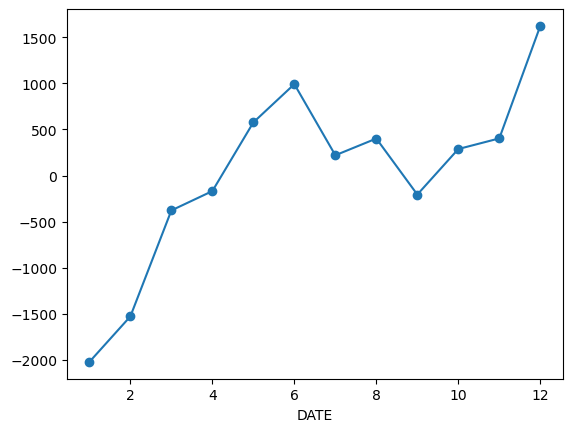

In [113]:
dtf = de_trned.reset_index()

dtf.groupby(dtf.DATE.dt.month)['Sales'].mean().plot(style='-o')


<Axes: xlabel='DATE'>

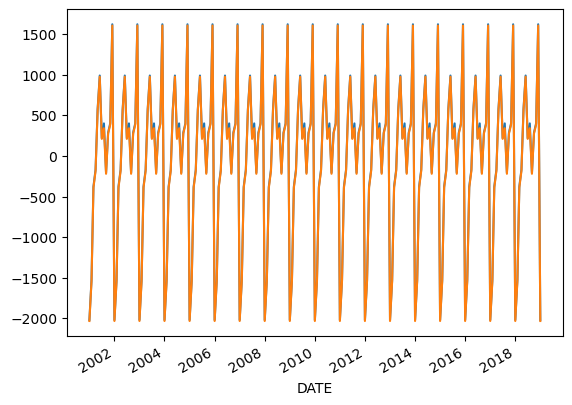

In [116]:
plt.plot(dtf.DATE,dtf.groupby(dtf.DATE.dt.month)['Sales'].transform('mean'))
model.seasonal.plot()

In [17]:
s = 'qwdftr'
def helper(val):
    cnt=0
    vowel =['a','e','i','o','u']
    for i in val:
        if(i in vowel):
            cnt+=1
    return cnt
final_ans = []
for i in range(len(s)):
    val = s[i:i+2]
    if(len(val)==2):
        tmp = helper(val)
        final_ans.append((tmp,val))
print(final_ans)

[(0, 'qw'), (0, 'wd'), (0, 'df'), (0, 'ft'), (0, 'tr')]


In [13]:
final_ans.sort(key=lambda x:x[0],reverse=True)

In [15]:
final_ans[0][1]

'erqii'